In [1]:
#How to check for installed libraries
#!pip list

In [2]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
# import pandas as pd

In [4]:
city='Nairobi'
api_key='f165de84018a38f46b630cd382c0d74b'
url = "http://api.openweathermap.org/data/2.5/weather"
units='metric'  # or 'imperial' for Fahrenheit
    
params = {
    'q': city, #City name
    'appid': api_key, #API
    'units': "metric"  #Temp is celcius
}

response = requests.get(url,params=params)


if response.status_code == 200:
    weather_data = response.json()
     # weather_dict = {
    #    'City': [city],
     #   'Temperature (°C)': [data['main']['temp']],
      #  'Humidity (%)': [data['main']['humidity']],
       # 'Pressure (hPa)': [data['main']['pressure']],
        #'Description': [data['weather'][0]['description']],
       # '#Wind Speed (m/s)': [data['wind']['speed']]
    #}
    
    #weather_data = pd.DataFrame(weather_dict)
   # print(weather_data)
else:
    print("Error:", data.get('message', 'Unable to fetch data'))

In [5]:
weather_data

{'coord': {'lon': 36.8167, 'lat': -1.2833},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 17.11,
  'feels_like': 16.7,
  'temp_min': 17.11,
  'temp_max': 17.11,
  'pressure': 1020,
  'humidity': 70,
  'sea_level': 1020,
  'grnd_level': 841},
 'visibility': 10000,
 'wind': {'speed': 1.94, 'deg': 105, 'gust': 1.83},
 'clouds': {'all': 82},
 'dt': 1753251447,
 'sys': {'country': 'KE', 'sunrise': 1753241843, 'sunset': 1753285242},
 'timezone': 10800,
 'id': 184745,
 'name': 'Nairobi',
 'cod': 200}

In [6]:
# Extract and print the relevant information
print(f"City: {weather_data['name']}")
print(f"Temperature: {weather_data['main']['temp']}°C")
print(f"Weather: {weather_data['weather'][0]['description']}")


City: Nairobi
Temperature: 17.11°C
Weather: broken clouds


In [7]:
def get_weather_data(city_name,api_key):
    """
    Fetches weather data for the given city using the OpenWeatherMap API.

    Parameters:
    - city_name(str): Name of the city (e.g. "Lagos","New York")
    - api_key (str): Your OpenWeatherMap API key
    
    Returns:
    - dict: Weather data as a dictionary, or an error message
    """
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        'q':city_name,
        'appid':api_key,
        'units':'metric'
    }

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status() # raises HTTPError for bad responses
    
        data= response.json ()
    
        weather = {
            'city': data ['name'],
            'country': data['sys']['country'],
            'temperature': data['main']['temp'],
            'description': data['weather'][0]['description'],
            'humidity': data['main']['humidity'],
            'wind_speed': data['wind']['speed']
            }
        
        return weather
    except requests.exceptions.HTTPError as err:
        return {'error': f"HTTP error occurred: (err)"}
    except requests.exceptions.RequestException as err:
        return {'error': f"Request failed: {err}"}
    except KeyError:
        return {'error': "Invalid response received. Check city name or API key."}


In [8]:
api_key = "f165de84018a38f46b630cd382c0d74b"
city = "Malindi"

weather_info = get_weather_data(city, api_key)

if 'error' in weather_info:
    print (weather_info['error'])
else:
    print(f"{weather_info['city']}, {weather_info['country']}")
    print (f"Temperature:{weather_info['temperature']}°C")
    print(f"Description:{weather_info['description']}")
    print(f"Humidity:{weather_info['humidity']}%")
    print(f"Wind Speed:{weather_info['wind_speed']} m/s")

Malindi, KE
Temperature:25.41°C
Description:light rain
Humidity:71%
Wind Speed:8.42 m/s


# Exploring GDP Data

In [9]:
# Define the country, indicator, and date range
country_code = 'KE'
indicator_id = 'NY.GDP.MKTP.CD'
date_range = '2010:2022'

# Construct the correct API URL without the incorrect source
url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator_id}"

# Set the parameters for the request
params = {
    'date': date_range,
    'format': 'json'
}

# Send the GET request to the API
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    
    # The actual data is in the second element of the list
    records = data[1]
    
    # Create a pandas DataFrame from the records
    df = pd.DataFrame(records)
    
    # Clean up the DataFrame
    df_clean = df[['date', 'value']].rename(columns={'date': 'Year', 'value': 'GDP_USD'})
    
    print("GDP for Kenya (2010-2022):")
    print(df_clean)
else:
    print(f"Error: Failed to retrieve data. Status Code: {response.status_code}")
    print("Response Text:", response.text)

GDP for Kenya (2010-2022):
    Year       GDP_USD
0   2022  1.144490e+11
1   2021  1.097037e+11
2   2020  1.006575e+11
3   2019  1.003784e+11
4   2018  9.220298e+10
5   2017  8.203651e+10
6   2016  7.481514e+10
7   2015  7.012045e+10
8   2014  6.828580e+10
9   2013  6.167144e+10
10  2012  5.639670e+10
11  2011  4.686947e+10
12  2010  4.540562e+10


In [10]:
# Define the country, indicator, and date range
country_code = 'GB' # United Kingdom's ISO code
indicator_id = 'NY.GDP.MKTP.CD' # GDP in current US$
date_range = '2010:2022'

# Construct the API URL
url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator_id}"

# Set the parameters for the request
params = {
    'date': date_range,
    'format': 'json'
}

# Send the GET request to the API
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    
    # The actual data is in the second element of the list
    records = data[1]
    
    # Create a pandas DataFrame from the records
    df = pd.DataFrame(records)
    
    # Clean up the DataFrame
    df_clean = df[['date', 'value']].rename(columns={'date': 'Year', 'value': 'GDP_USD'})
    
    print("GDP for the United Kingdom (2010-2022):")
    print(df_clean)
else:
    print(f"Error: Failed to retrieve data. Status Code: {response.status_code}")
    print("Response Text:", response.text)

GDP for the United Kingdom (2010-2022):
    Year       GDP_USD
0   2022  3.114042e+12
1   2021  3.143323e+12
2   2020  2.696778e+12
3   2019  2.851407e+12
4   2018  2.871340e+12
5   2017  2.680148e+12
6   2016  2.689107e+12
7   2015  2.927911e+12
8   2014  3.064708e+12
9   2013  2.784854e+12
10  2012  2.707090e+12
11  2011  2.663806e+12
12  2010  2.485483e+12


In [11]:
# Define the country and date range
country_code = 'KE'
date_range = '2010:2022'

# Define World Bank indicator codes for GDP, life expectancy, and fertility rate
indicators = {
    'GDP_USD': 'NY.GDP.MKTP.CD',
    'Life_Expectancy': 'SP.DYN.LE00.IN',
    'Fertility_Rate': 'SP.DYN.TFRT.IN'
}

# Empty dictionary to hold individual DataFrames
data_frames = {}

# Loop through indicators and request data
for label, indicator_id in indicators.items():
    url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator_id}"
    params = {
        'date': date_range,
        'format': 'json',
        'per_page': 100  # Increase page size just in case
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        records = data[1]
        df = pd.DataFrame(records)
        df_clean = df[['date', 'value']].rename(columns={'date': 'Year', 'value': label})
        df_clean['Year'] = df_clean['Year'].astype(int)
        data_frames[label] = df_clean
    else:
        print(f"Failed to retrieve {label}: {response.status_code}")
        print("Response Text:", response.text)

# Merge all dataframes on 'Year'
merged_df = data_frames['GDP_USD']
for label in ['Life_Expectancy', 'Fertility_Rate']:
    merged_df = pd.merge(merged_df, data_frames[label], on='Year', how='outer')

# Sort by Year
merged_df = merged_df.sort_values('Year', ascending=False).reset_index(drop=True)

# Print the result
print("Kenya: GDP, Life Expectancy, and Fertility Rate (2010–2022)")
print(merged_df)

Kenya: GDP, Life Expectancy, and Fertility Rate (2010–2022)
    Year       GDP_USD  Life_Expectancy  Fertility_Rate
0   2022  1.144490e+11           63.549           3.262
1   2021  1.097037e+11           61.225           3.312
2   2020  1.006575e+11           61.596           3.364
3   2019  1.003784e+11           62.939           3.433
4   2018  9.220298e+10           62.825           3.536
5   2017  8.203651e+10           62.725           3.609
6   2016  7.481514e+10           62.526           3.689
7   2015  7.012045e+10           62.279           3.766
8   2014  6.828580e+10           61.990           3.843
9   2013  6.167144e+10           61.729           3.955
10  2012  5.639670e+10           61.537           4.116
11  2011  4.686947e+10           61.283           4.284
12  2010  4.540562e+10           60.915           4.446


In [12]:
# Getting World Bank data via API for the UK

country_code = "GB" # ISO code for the country
indicator_id = "NY.GDP.MKTP.CD"

date_range = "2008:2022"

# Data source
url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator_id}"

# Set the parameters for the request
params = {
    'date': date_range,
    'format': 'json'
}

# Send a GET request to the remote resource
response = requests.get(url, params)

# Process returned data
if response.status_code == 200:
    dev_data = response.json()
    
    # Filter the returned data t
    gb_data = dev_data[1]

    #Converting the list of dictionaries into dataframe
    gb_df = pd.DataFrame(gb_data)

    #Clean the DataFrame
    gd_df= gb_df[["date","value"]]

    #Rename the columns
    gd_df = gd_df.rename(columns={"date":"Year","value":"GDP_USD"})
    
else:
    pass

In [14]:
gb_data

[{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'GB', 'value': 'United Kingdom'},
  'countryiso3code': 'GBR',
  'date': '2022',
  'value': 3114042471144.39,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'GB', 'value': 'United Kingdom'},
  'countryiso3code': 'GBR',
  'date': '2021',
  'value': 3143323050707.26,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'GB', 'value': 'United Kingdom'},
  'countryiso3code': 'GBR',
  'date': '2020',
  'value': 2696778386607.65,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'GB', 'value': 'United Kingdom'},
  'countryiso3code': 'GBR',
  'date': '2019',
  'value': 2851407164907.81,
  'unit': '',
  'obs_status': '',
  'decimal': 

In [13]:
gb_df

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'GB', 'value': 'United Kingdom'}",GBR,2022,3.114042e+12,,,0
1,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'GB', 'value': 'United Kingdom'}",GBR,2021,3.143323e+12,,,0
2,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'GB', 'value': 'United Kingdom'}",GBR,2020,2.696778e+12,,,0
3,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'GB', 'value': 'United Kingdom'}",GBR,2019,2.851407e+12,,,0
4,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'GB', 'value': 'United Kingdom'}",GBR,2018,2.871340e+12,,,0
5,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'GB', 'value': 'United Kingdom'}",GBR,2017,2.680148e+12,,,0
6,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'GB', 'value': 'United Kingdom'}",GBR,2016,2.689107e+12,,,0
7,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'GB', 'value': 'United Kingdom'}",GBR,2015,2.927911e+12,,,0
8,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'GB', 'value': 'United Kingdom'}",GBR,2014,3.064708e+12,,,0
9,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'GB', 'value': 'United Kingdom'}",GBR,2013,2.784854e+12,,,0


# Homework: Get the population,fertility, life expectancy at birth, GDP for Kenya from 2007 to 2022 and merge it with gapminder data for Kenya

In [15]:
# Define the country and date range
country_code = 'KE'
date_range = '2008:2022'

# Define World Bank indicator codes for GDP, life expectancy, and fertility rate
indicators = {
    'GDP_USD': 'NY.GDP.MKTP.CD',
    'Life_Expectancy': 'SP.DYN.LE00.IN',
    'Fertility_Rate': 'SP.DYN.TFRT.IN',
    'Population': "SP.POP.TOTL"
}

# Empty dictionary to hold individual DataFrames
data_frames = {}

# Loop through indicators and request data
for label, indicator_id in indicators.items():
    url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator_id}"
    params = {
        'date': date_range,
        'format': 'json',
        'per_page': 100  # Increase page size just in case
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        records = data[1]
        df = pd.DataFrame(records)
        df_clean = df[['date', 'value']].rename(columns={'date': 'Year', 'value': label})
        df_clean['Year'] = df_clean['Year'].astype(int)
        data_frames[label] = df_clean
    else:
        print(f"Failed to retrieve {label}: {response.status_code}")
        print("Response Text:", response.text)

# Merge all dataframes on 'Year'
merged_df = data_frames['GDP_USD']
for label in ['Life_Expectancy', 'Fertility_Rate', 'Population']:
    merged_df = pd.merge(merged_df, data_frames[label], on='Year', how='outer')

# Sort by Year
merged_df = merged_df.sort_values('Year', ascending=False).reset_index(drop=True)

# Print the result
print("Kenya: GDP, Life Expectancy, and Fertility Rate (2007–2022)")
print(merged_df)

Kenya: GDP, Life Expectancy, and Fertility Rate (2007–2022)
    Year       GDP_USD  Life_Expectancy  Fertility_Rate  Population
0   2022  1.144490e+11           63.549           3.262    54252461
1   2021  1.097037e+11           61.225           3.312    53219166
2   2020  1.006575e+11           61.596           3.364    52217334
3   2019  1.003784e+11           62.939           3.433    51202827
4   2018  9.220298e+10           62.825           3.536    50207107
5   2017  8.203651e+10           62.725           3.609    49197766
6   2016  7.481514e+10           62.526           3.689    48139687
7   2015  7.012045e+10           62.279           3.766    47088526
8   2014  6.828580e+10           61.990           3.843    46051440
9   2013  6.167144e+10           61.729           3.955    44986791
10  2012  5.639670e+10           61.537           4.116    43888303
11  2011  4.686947e+10           61.283           4.284    42758461
12  2010  4.540562e+10           60.915           4.446 

In [16]:
merged_df

,Year,GDP_USD,Life_Expectancy,Fertility_Rate,Population
0,2022,1.144490e+11,63.549,3.262,54252461
1,2021,1.097037e+11,61.225,3.312,53219166
2,2020,1.006575e+11,61.596,3.364,52217334
3,2019,1.003784e+11,62.939,3.433,51202827
4,2018,9.220298e+10,62.825,3.536,50207107
5,2017,8.203651e+10,62.725,3.609,49197766
6,2016,7.481514e+10,62.526,3.689,48139687
7,2015,7.012045e+10,62.279,3.766,47088526
8,2014,6.828580e+10,61.990,3.843,46051440
9,2013,6.167144e+10,61.729,3.955,44986791


In [17]:
gapminder_data = pd.read_csv("C:/Users/HomePC/Desktop/CSA2025/intro_to_data_science/Data/gapminder.csv")
#gapminder_data_kenya=pd.read_csv(":\Users\HomePC\Desktop\CSA2025\intro_to_data_science\Data\
gapminder_data[(gapminder_data["country"] =="Kenya")]


,country,continent,year,life_exp,pop,gdp_per_cap,infant_mortality,fertility
816,Kenya,Africa,1952,42.270,6464046.0,853.540919,NaN,NaN
817,Kenya,Africa,1957,44.686,7454779.0,944.438315,NaN,NaN
818,Kenya,Africa,1962,47.949,8678557.0,896.966373,109.9,8.04
819,Kenya,Africa,1967,50.654,10191512.0,1056.736457,97.1,8.13
820,Kenya,Africa,1972,53.559,12044785.0,1222.359968,87.3,8.01
821,Kenya,Africa,1977,56.155,14500404.0,1267.613204,76.0,7.70
822,Kenya,Africa,1982,58.766,17661452.0,1348.225791,65.8,7.27
823,Kenya,Africa,1987,59.339,21198082.0,1361.936856,62.7,6.60
824,Kenya,Africa,1992,59.285,25020539.0,1341.921721,68.9,5.67
825,Kenya,Africa,1997,54.407,28263827.0,1360.485021,71.1,5.10


In [18]:
gapminder_data_Kenya=gapminder_data[(gapminder_data["country"] =="Kenya")]
gapminder_data_Kenya

,country,continent,year,life_exp,pop,gdp_per_cap,infant_mortality,fertility
816,Kenya,Africa,1952,42.270,6464046.0,853.540919,NaN,NaN
817,Kenya,Africa,1957,44.686,7454779.0,944.438315,NaN,NaN
818,Kenya,Africa,1962,47.949,8678557.0,896.966373,109.9,8.04
819,Kenya,Africa,1967,50.654,10191512.0,1056.736457,97.1,8.13
820,Kenya,Africa,1972,53.559,12044785.0,1222.359968,87.3,8.01
821,Kenya,Africa,1977,56.155,14500404.0,1267.613204,76.0,7.70
822,Kenya,Africa,1982,58.766,17661452.0,1348.225791,65.8,7.27
823,Kenya,Africa,1987,59.339,21198082.0,1361.936856,62.7,6.60
824,Kenya,Africa,1992,59.285,25020539.0,1341.921721,68.9,5.67
825,Kenya,Africa,1997,54.407,28263827.0,1360.485021,71.1,5.10


In [19]:
gapminder_data_Kenya.drop(['continent'],axis=1,inplace=True)
gapminder_data_Kenya

C:\Users\HomePC\AppData\Local\Temp\ipykernel_11944\462991549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gapminder_data_Kenya.drop(['continent'],axis=1,inplace=True)


,country,year,life_exp,pop,gdp_per_cap,infant_mortality,fertility
816,Kenya,1952,42.270,6464046.0,853.540919,NaN,NaN
817,Kenya,1957,44.686,7454779.0,944.438315,NaN,NaN
818,Kenya,1962,47.949,8678557.0,896.966373,109.9,8.04
819,Kenya,1967,50.654,10191512.0,1056.736457,97.1,8.13
820,Kenya,1972,53.559,12044785.0,1222.359968,87.3,8.01
821,Kenya,1977,56.155,14500404.0,1267.613204,76.0,7.70
822,Kenya,1982,58.766,17661452.0,1348.225791,65.8,7.27
823,Kenya,1987,59.339,21198082.0,1361.936856,62.7,6.60
824,Kenya,1992,59.285,25020539.0,1341.921721,68.9,5.67
825,Kenya,1997,54.407,28263827.0,1360.485021,71.1,5.10


In [20]:
gapminder_data_Kenya.drop(['infant_mortality'],axis=1,inplace=True)
gapminder_data_Kenya

C:\Users\HomePC\AppData\Local\Temp\ipykernel_11944\3458510889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gapminder_data_Kenya.drop(['infant_mortality'],axis=1,inplace=True)


,country,year,life_exp,pop,gdp_per_cap,fertility
816,Kenya,1952,42.270,6464046.0,853.540919,NaN
817,Kenya,1957,44.686,7454779.0,944.438315,NaN
818,Kenya,1962,47.949,8678557.0,896.966373,8.04
819,Kenya,1967,50.654,10191512.0,1056.736457,8.13
820,Kenya,1972,53.559,12044785.0,1222.359968,8.01
821,Kenya,1977,56.155,14500404.0,1267.613204,7.70
822,Kenya,1982,58.766,17661452.0,1348.225791,7.27
823,Kenya,1987,59.339,21198082.0,1361.936856,6.60
824,Kenya,1992,59.285,25020539.0,1341.921721,5.67
825,Kenya,1997,54.407,28263827.0,1360.485021,5.10


In [21]:
gapminder_data_Kenya1=gapminder_data_Kenya
gapminder_data_Kenya1

,country,year,life_exp,pop,gdp_per_cap,fertility
816,Kenya,1952,42.270,6464046.0,853.540919,NaN
817,Kenya,1957,44.686,7454779.0,944.438315,NaN
818,Kenya,1962,47.949,8678557.0,896.966373,8.04
819,Kenya,1967,50.654,10191512.0,1056.736457,8.13
820,Kenya,1972,53.559,12044785.0,1222.359968,8.01
821,Kenya,1977,56.155,14500404.0,1267.613204,7.70
822,Kenya,1982,58.766,17661452.0,1348.225791,7.27
823,Kenya,1987,59.339,21198082.0,1361.936856,6.60
824,Kenya,1992,59.285,25020539.0,1341.921721,5.67
825,Kenya,1997,54.407,28263827.0,1360.485021,5.10


In [22]:
world_bank_kenya=merged_df
world_bank_kenya

,Year,GDP_USD,Life_Expectancy,Fertility_Rate,Population
0,2022,1.144490e+11,63.549,3.262,54252461
1,2021,1.097037e+11,61.225,3.312,53219166
2,2020,1.006575e+11,61.596,3.364,52217334
3,2019,1.003784e+11,62.939,3.433,51202827
4,2018,9.220298e+10,62.825,3.536,50207107
5,2017,8.203651e+10,62.725,3.609,49197766
6,2016,7.481514e+10,62.526,3.689,48139687
7,2015,7.012045e+10,62.279,3.766,47088526
8,2014,6.828580e+10,61.990,3.843,46051440
9,2013,6.167144e+10,61.729,3.955,44986791


In [23]:
world_bank_kenya['country']='Kenya'
world_bank_kenya

,Year,GDP_USD,Life_Expectancy,Fertility_Rate,Population,country
0,2022,1.144490e+11,63.549,3.262,54252461,Kenya
1,2021,1.097037e+11,61.225,3.312,53219166,Kenya
2,2020,1.006575e+11,61.596,3.364,52217334,Kenya
3,2019,1.003784e+11,62.939,3.433,51202827,Kenya
4,2018,9.220298e+10,62.825,3.536,50207107,Kenya
5,2017,8.203651e+10,62.725,3.609,49197766,Kenya
6,2016,7.481514e+10,62.526,3.689,48139687,Kenya
7,2015,7.012045e+10,62.279,3.766,47088526,Kenya
8,2014,6.828580e+10,61.990,3.843,46051440,Kenya
9,2013,6.167144e+10,61.729,3.955,44986791,Kenya


In [24]:
merged_df.rename(columns={
    'Year': 'year',
    'GDP_USD':'gdp_per_cap',
    'Population':'pop',
    'Fertility_Rate':'fertility',
    'Life_Expectancy':'life_exp'
}, inplace=True)
merged_df

,year,gdp_per_cap,life_exp,fertility,pop,country
0,2022,1.144490e+11,63.549,3.262,54252461,Kenya
1,2021,1.097037e+11,61.225,3.312,53219166,Kenya
2,2020,1.006575e+11,61.596,3.364,52217334,Kenya
3,2019,1.003784e+11,62.939,3.433,51202827,Kenya
4,2018,9.220298e+10,62.825,3.536,50207107,Kenya
5,2017,8.203651e+10,62.725,3.609,49197766,Kenya
6,2016,7.481514e+10,62.526,3.689,48139687,Kenya
7,2015,7.012045e+10,62.279,3.766,47088526,Kenya
8,2014,6.828580e+10,61.990,3.843,46051440,Kenya
9,2013,6.167144e+10,61.729,3.955,44986791,Kenya


In [25]:
world_bank_kenya=merged_df
world_bank_kenya

,year,gdp_per_cap,life_exp,fertility,pop,country
0,2022,1.144490e+11,63.549,3.262,54252461,Kenya
1,2021,1.097037e+11,61.225,3.312,53219166,Kenya
2,2020,1.006575e+11,61.596,3.364,52217334,Kenya
3,2019,1.003784e+11,62.939,3.433,51202827,Kenya
4,2018,9.220298e+10,62.825,3.536,50207107,Kenya
5,2017,8.203651e+10,62.725,3.609,49197766,Kenya
6,2016,7.481514e+10,62.526,3.689,48139687,Kenya
7,2015,7.012045e+10,62.279,3.766,47088526,Kenya
8,2014,6.828580e+10,61.990,3.843,46051440,Kenya
9,2013,6.167144e+10,61.729,3.955,44986791,Kenya


In [26]:
gapminder_data_kenya_Final = pd.concat([gapminder_data_Kenya1,world_bank_kenya], ignore_index=True)
gapminder_data_kenya_Final

,country,year,life_exp,pop,gdp_per_cap,fertility
0,Kenya,1952,42.270,6464046.0,8.535409e+02,NaN
1,Kenya,1957,44.686,7454779.0,9.444383e+02,NaN
2,Kenya,1962,47.949,8678557.0,8.969664e+02,8.040
3,Kenya,1967,50.654,10191512.0,1.056736e+03,8.130
4,Kenya,1972,53.559,12044785.0,1.222360e+03,8.010
5,Kenya,1977,56.155,14500404.0,1.267613e+03,7.700
6,Kenya,1982,58.766,17661452.0,1.348226e+03,7.270
7,Kenya,1987,59.339,21198082.0,1.361937e+03,6.600
8,Kenya,1992,59.285,25020539.0,1.341922e+03,5.670
9,Kenya,1997,54.407,28263827.0,1.360485e+03,5.100


In [27]:
gapminder_data_Kenya_Final=gapminder_data_kenya_Final.sort_values(by='year')
gapminder_data_Kenya_Final

,country,year,life_exp,pop,gdp_per_cap,fertility
0,Kenya,1952,42.270,6464046.0,8.535409e+02,NaN
1,Kenya,1957,44.686,7454779.0,9.444383e+02,NaN
2,Kenya,1962,47.949,8678557.0,8.969664e+02,8.040
3,Kenya,1967,50.654,10191512.0,1.056736e+03,8.130
4,Kenya,1972,53.559,12044785.0,1.222360e+03,8.010
5,Kenya,1977,56.155,14500404.0,1.267613e+03,7.700
6,Kenya,1982,58.766,17661452.0,1.348226e+03,7.270
7,Kenya,1987,59.339,21198082.0,1.361937e+03,6.600
8,Kenya,1992,59.285,25020539.0,1.341922e+03,5.670
9,Kenya,1997,54.407,28263827.0,1.360485e+03,5.100


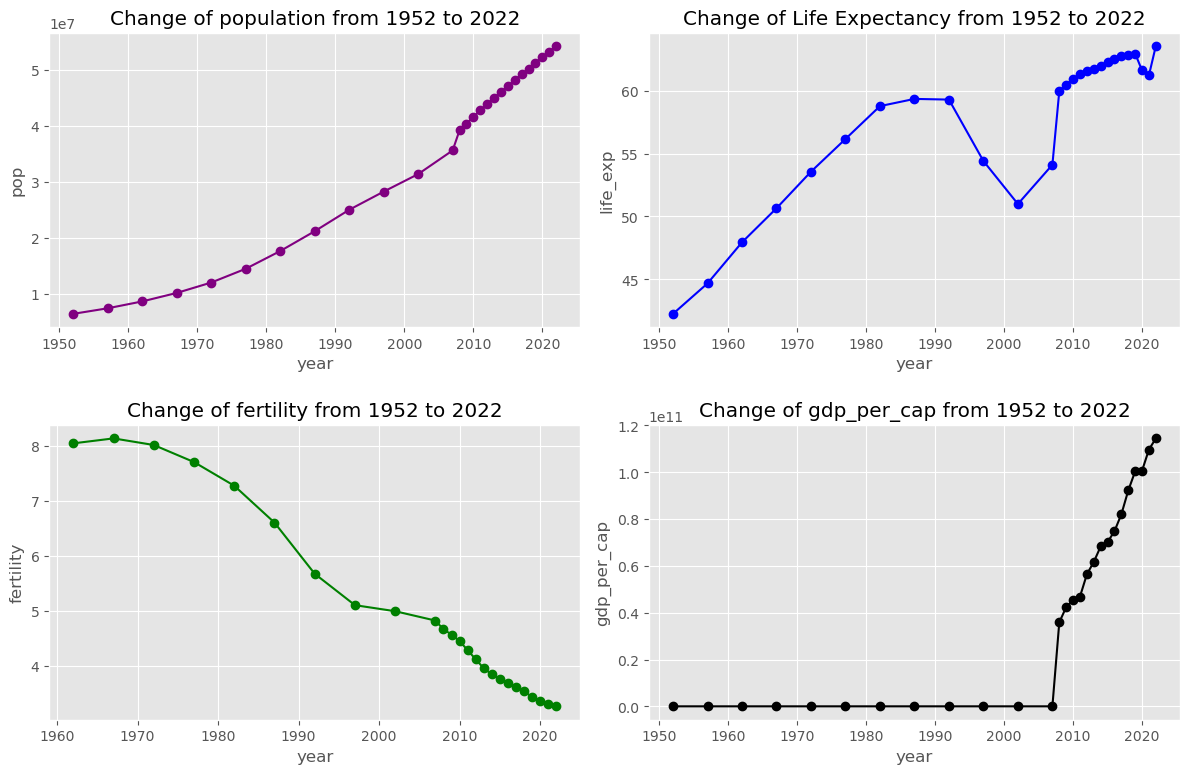

In [28]:
plt.style.use("ggplot")
#plt.style.use("dark_background")

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

#Population
axs[0,0].plot(gapminder_data_Kenya_Final["year"],gapminder_data_Kenya_Final["pop"],color="purple",marker = "o")
axs[0, 0].set_title("Change of population from 1952 to 2022")
axs[0, 0].set_xlabel("year")
axs[0, 0].set_ylabel("pop")

#Life Expectancy
axs[0,1].plot(gapminder_data_Kenya_Final["year"],gapminder_data_Kenya_Final["life_exp"],color="blue",marker = "o")
axs[0, 1].set_title("Change of Life Expectancy from 1952 to 2022")
axs[0, 1].set_xlabel("year")
axs[0, 1].set_ylabel("life_exp")

#Fertility
axs[1,0].plot(gapminder_data_Kenya_Final["year"],gapminder_data_Kenya_Final["fertility"],color="green",marker = "o")
axs[1, 0].set_title("Change of fertility from 1952 to 2022")
axs[1, 0].set_xlabel("year")
axs[1, 0].set_ylabel("fertility")

#GDP_per_cap
axs[1,1].plot(gapminder_data_Kenya_Final["year"],gapminder_data_Kenya_Final["gdp_per_cap"],color="black",marker = "o")
axs[1, 1].set_title("Change of gdp_per_cap from 1952 to 2022")
axs[1, 1].set_xlabel("year")
axs[1, 1].set_ylabel("gdp_per_cap")

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plot
plt.show()

In [29]:

fig.savefig("C:/Users/HomePC/Desktop/CSA2025/intro_to_data_science/Data/Output/gapminder_data_Kenya_Final.png")

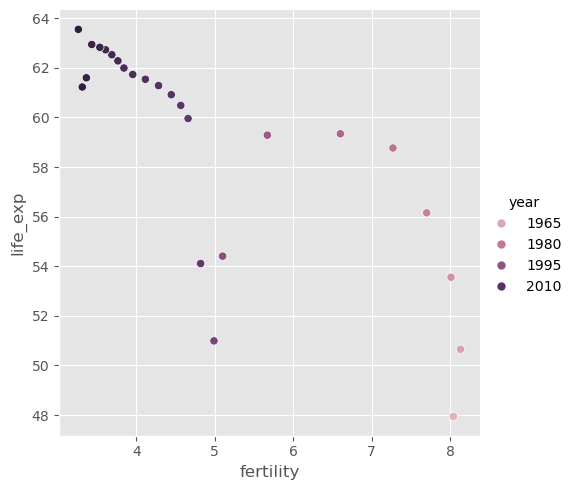

In [30]:
import seaborn as sns

#Import the dataset of gapminder_Kenya
sns.relplot(
    data = gapminder_data_Kenya_Final,
    x = "fertility", y ="life_exp",
    hue = "year",sizes= (10,1000))

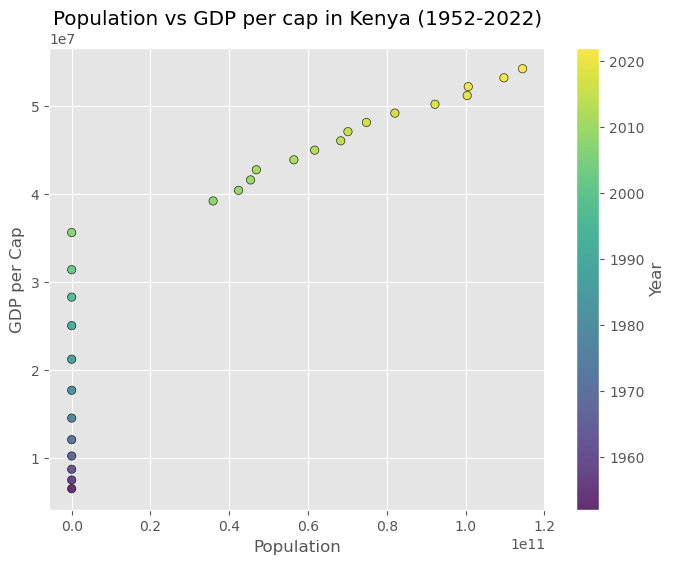

In [31]:
#Heatmap
plt. figure(figsize=(8, 6))
scatter = plt. scatter(
    gapminder_data_Kenya_Final['gdp_per_cap'],
    gapminder_data_Kenya_Final['pop'],
    c=gapminder_data_Kenya_Final['year'], # Color by year cmap='viridis'
    edgecolor= 'k',
    alpha=0.8
)
plt.title('Population vs GDP per cap in Kenya (1952-2022)')
plt.xlabel('Population')
plt.ylabel('GDP per Cap')
plt.colorbar(scatter, label='Year') # Add color legend for years pit. grid (True)
plt.show()

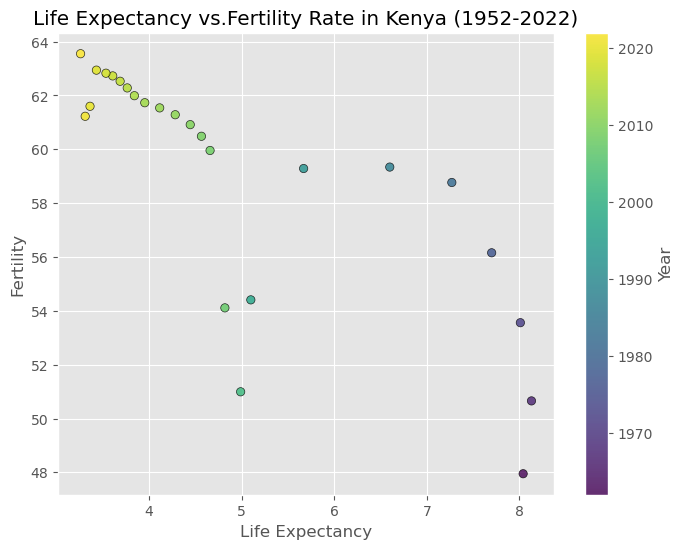

In [32]:
#Heatmap
plt. figure(figsize=(8, 6))
scatter = plt. scatter(
    gapminder_data_Kenya_Final['fertility'],
    gapminder_data_Kenya_Final['life_exp'],
    c=gapminder_data_Kenya_Final['year'], # Color by year cmap='viridis'
    edgecolor= 'k',
    alpha=0.8
)
plt.title('Life Expectancy vs.Fertility Rate in Kenya (1952-2022)')
plt.xlabel('Life Expectancy')
plt.ylabel('Fertility')
plt.colorbar(scatter, label='Year') # Add color legend for years pit. grid (True)
plt.show()